In [6]:
import pandas as pd

In [7]:
import numpy as np

In [8]:
import datetime as dt

In [9]:
from collections import Counter

In [10]:
%matplotlib inline

In [11]:
import matplotlib.pyplot as plt

In [12]:
from mpl_toolkits import mplot3d

# Loading Data

In [13]:
XRP_Increase = pd.read_csv('../XRP_5min_Increase_SmallAmount_5min.csv')
XRP_Decrease = pd.read_csv('../XRP_5min_Decrease_SmallAmount_5min.csv')

In [14]:
original_columns = ['datetime_real','date','close','high','low','open','quoteVolume','volume','weightedAverage']

In [15]:
max_time = 3456789123

In [16]:
XRP_Increase[original_columns].head(2)

,datetime_real,date,close,high,low,open,quoteVolume,volume,weightedAverage
0,2017-05-04 06:20:00,1493875200,0.069288,0.069960,0.069288,0.069960,163.538132,11.431388,0.069900
1,2017-05-04 06:25:00,1493875500,0.069100,0.069949,0.069000,0.069949,113714.544855,7909.709770,0.069558


In [17]:
[d for d in XRP_Decrease.columns if 'decrease' in d.lower()]

['Decrease_0.1_percent',
 'Decrease_0.2_percent',
 'Decrease_0.3_percent',
 'Decrease_0.4_percent',
 'Decrease_0.5_percent',
 'Decrease_0.6_percent',
 'Decrease_0.8_percent',
 'Decrease_1.0_percent',
 'Decrease_1.2_percent',
 'Decrease_1.5_percent']

In [18]:
XRP_Decrease.head()

,Unnamed: 0,Unnamed: 0.1,close,date,high,low,open,quoteVolume,volume,weightedAverage,...,Decrease_0.1_percent,Decrease_0.2_percent,Decrease_0.3_percent,Decrease_0.4_percent,Decrease_0.5_percent,Decrease_0.6_percent,Decrease_0.8_percent,Decrease_1.0_percent,Decrease_1.2_percent,Decrease_1.5_percent
0,12736,12736,0.069288,1493875200,0.069960,0.069288,0.069960,163.538132,11.431388,0.069900,...,1493875500,1493875500,1493875500,1493875500,1493875800,1493875800,1493875800,1493875800,1493875800,1493875800
1,12737,12737,0.069100,1493875500,0.069949,0.069000,0.069949,113714.544855,7909.709770,0.069558,...,1493875800,1493875800,1493875800,1493875800,1493875800,1493875800,1493875800,1493875800,1493875800,1493875800
2,12738,12738,0.068000,1493875800,0.069100,0.067500,0.069000,220670.240024,15126.256548,0.068547,...,1493876100,1493876100,1493876100,1493876100,1493876100,1493876100,1493876100,1493876100,1493876100,1493876100
3,12739,12739,0.068465,1493876100,0.068465,0.066432,0.067800,271144.858354,18298.825581,0.067487,...,3456789123,3456789123,3456789123,3456789123,3456789123,3456789123,3456789123,3456789123,3456789123,3456789123
4,12740,12740,0.068646,1493876400,0.068646,0.067517,0.067802,595249.214904,40678.358104,0.068338,...,3456789123,3456789123,3456789123,3456789123,3456789123,3456789123,3456789123,3456789123,3456789123,3456789123


## Only Events

In [19]:
df_increae_coln = ['date','close'] +  ['volume'] + [d for d in XRP_Increase.columns if 'increase' in d.lower()]
df_decreae_coln = [d for d in XRP_Decrease.columns if 'decrease' in d.lower()]

In [20]:
event_tables = XRP_Increase[df_increae_coln].merge(XRP_Decrease[df_decreae_coln + ['date']], how = 'outer')

In [21]:
event_tables = event_tables[event_tables['volume'] != 0]  # to filter out all the 5min intervals where no activities happened

In [22]:
increase_events = [d for d in XRP_Increase.columns if 'increase' in d.lower()]

In [23]:
decrease_events = [d for d in XRP_Decrease.columns if 'decrease' in d.lower()]

In [24]:
increase_events

['Increase_0.1_percent',
 'Increase_0.2_percent',
 'Increase_0.3_percent',
 'Increase_0.4_percent',
 'Increase_0.5_percent',
 'Increase_0.6_percent',
 'Increase_0.8_percent',
 'Increase_1.0_percent',
 'Increase_1.2_percent',
 'Increase_1.5_percent']

In [25]:
decrease_events

['Decrease_0.1_percent',
 'Decrease_0.2_percent',
 'Decrease_0.3_percent',
 'Decrease_0.4_percent',
 'Decrease_0.5_percent',
 'Decrease_0.6_percent',
 'Decrease_0.8_percent',
 'Decrease_1.0_percent',
 'Decrease_1.2_percent',
 'Decrease_1.5_percent']

In [26]:
event_tables.columns

Index(['date', 'close', 'volume', 'Increase_0.1_percent',
       'Increase_0.2_percent', 'Increase_0.3_percent', 'Increase_0.4_percent',
       'Increase_0.5_percent', 'Increase_0.6_percent', 'Increase_0.8_percent',
       'Increase_1.0_percent', 'Increase_1.2_percent', 'Increase_1.5_percent',
       'Decrease_0.1_percent', 'Decrease_0.2_percent', 'Decrease_0.3_percent',
       'Decrease_0.4_percent', 'Decrease_0.5_percent', 'Decrease_0.6_percent',
       'Decrease_0.8_percent', 'Decrease_1.0_percent', 'Decrease_1.2_percent',
       'Decrease_1.5_percent'],
      dtype='object')

In [27]:
event_pairs = []
for inc in increase_events:
    for dec in decrease_events:
        event_pairs.append({inc: dec})
    pass

In [28]:
a = pd.DataFrame([[12,3,4,5], [4,5,6,5]]).T

In [29]:
a[2] = a[0] - a[1]

In [30]:
a

,0,1,2
0,12,4,8
1,3,5,-2
2,4,6,-2
3,5,5,0


In [31]:
a[((a[0] - a[1]) < -2)]

,0,1,2


In [32]:
min(event_tables['Increase_0.1_percent'] - event_tables['date'])

300

In [33]:
total_events = len(event_tables)

In [34]:
within_x_hour = 2 #profit within x hour

num_increase = event_tables[(event_tables['Increase_0.1_percent'] < event_tables['Decrease_0.1_percent']) &
                            (event_tables['Increase_0.1_percent'] - event_tables['date'] <= (1/12)*3600)]   # number of events where increase 0.1% happens before decrease 0.1%



In [94]:
## adjust event table for different timeframes

In [ ]:
i.e.:
    event[:10000]
    event[10000:20000] etc

In [93]:
inc_records = []
dec_records = []
plot_records = []

x_y_z_cor = []

for hour in [1]:
    # get how many hour
    
    for pair in event_pairs:
        for inc, dec in pair.items(): # get increase and decrease due to dictionary

            num_increase = event_tables[(event_tables[inc] < event_tables[dec]) &
                                (event_tables[inc] - event_tables['date'] <= (hour)*3600)]
            
            unique_inc = event_tables[(event_tables[inc] < event_tables[dec]) &
                                (event_tables[inc] - event_tables['date'] <= (hour)*3600)][inc].unique()
            
            plot_records.append(100* (len(num_increase)/ total_events))
            inc_records.append(inc)
            dec_records.append(dec)
            
            
            x_y_z_cor.append([(float(inc.split('_')[1]),   # x - increase
                              float(dec.split('_')[1])) ,    # y - decrease
                              100* (len(num_increase)/ total_events) , 
                              100* (len(unique_inc)/ total_events) ] )   # z - percentage of event happening
            
            pass

In [87]:
corr  = pd.DataFrame(np.array(x_y_z_cor))

In [89]:
corr[0] = [str(d) for d in corr[0]]

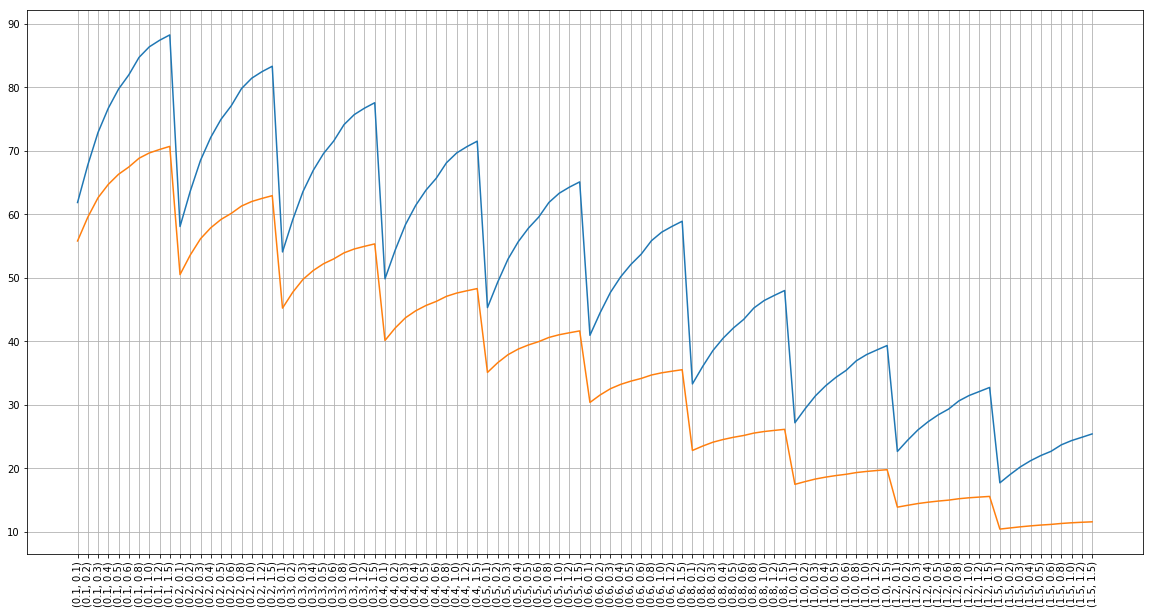

In [90]:
plt.figure(figsize= (20,10))


# tran_y_low = ploting_breakdown['low']
# tran_y_high = ploting_breakdown['high']

# tran_y_ra = ploting_breakdown['2H_RA_on_Close']

tran_x = corr[0]
train_y = corr[1]

train_y1 = corr[2]

labels = tran_x
plt.plot(tran_x, train_y)
plt.plot(tran_x, train_y1)

plt.xticks(tran_x, labels, rotation='vertical')
plt.grid()

array([(0.1, 0.1), (0.1, 0.2), (0.1, 0.3), (0.1, 0.4), (0.1, 0.5),
       (0.1, 0.6), (0.1, 0.8), (0.1, 1.0), (0.1, 1.2), (0.1, 1.5),
       (0.2, 0.1), (0.2, 0.2), (0.2, 0.3), (0.2, 0.4), (0.2, 0.5),
       (0.2, 0.6), (0.2, 0.8), (0.2, 1.0), (0.2, 1.2), (0.2, 1.5),
       (0.3, 0.1), (0.3, 0.2), (0.3, 0.3), (0.3, 0.4), (0.3, 0.5),
       (0.3, 0.6), (0.3, 0.8), (0.3, 1.0), (0.3, 1.2), (0.3, 1.5),
       (0.4, 0.1), (0.4, 0.2), (0.4, 0.3), (0.4, 0.4), (0.4, 0.5),
       (0.4, 0.6), (0.4, 0.8), (0.4, 1.0), (0.4, 1.2), (0.4, 1.5),
       (0.5, 0.1), (0.5, 0.2), (0.5, 0.3), (0.5, 0.4), (0.5, 0.5),
       (0.5, 0.6), (0.5, 0.8), (0.5, 1.0), (0.5, 1.2), (0.5, 1.5),
       (0.6, 0.1), (0.6, 0.2), (0.6, 0.3), (0.6, 0.4), (0.6, 0.5),
       (0.6, 0.6), (0.6, 0.8), (0.6, 1.0), (0.6, 1.2), (0.6, 1.5),
       (0.8, 0.1), (0.8, 0.2), (0.8, 0.3), (0.8, 0.4), (0.8, 0.5),
       (0.8, 0.6), (0.8, 0.8), (0.8, 1.0), (0.8, 1.2), (0.8, 1.5),
       (1.0, 0.1), (1.0, 0.2), (1.0, 0.3), (1.0, 0.4), (1.0, 0

In [51]:
pd.DataFrame(x_y_z_cor)#.plot()

,0,1
0,"(0.1, 0.1)",61.852871
1,"(0.1, 0.2)",67.761288
2,"(0.1, 0.3)",72.886044
3,"(0.1, 0.4)",76.696748
4,"(0.1, 0.5)",79.706533
5,"(0.1, 0.6)",81.939764
6,"(0.1, 0.8)",84.696788
7,"(0.1, 1.0)",86.356992
8,"(0.1, 1.2)",87.383771
9,"(0.1, 1.5)",88.235951


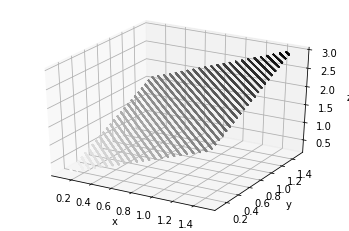

In [37]:
def f(x, y):
    return x+y

x = np.array(x_y_z_cor)[:,0]
y = np.array(x_y_z_cor)[:,1]

X, Y = np.meshgrid(x, y)
Z = f(X, Y)


fig = plt.figure()
ax = plt.axes(projection='3d')
ax.contour3D(X, Y, Z, 50, cmap='binary')


ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z');

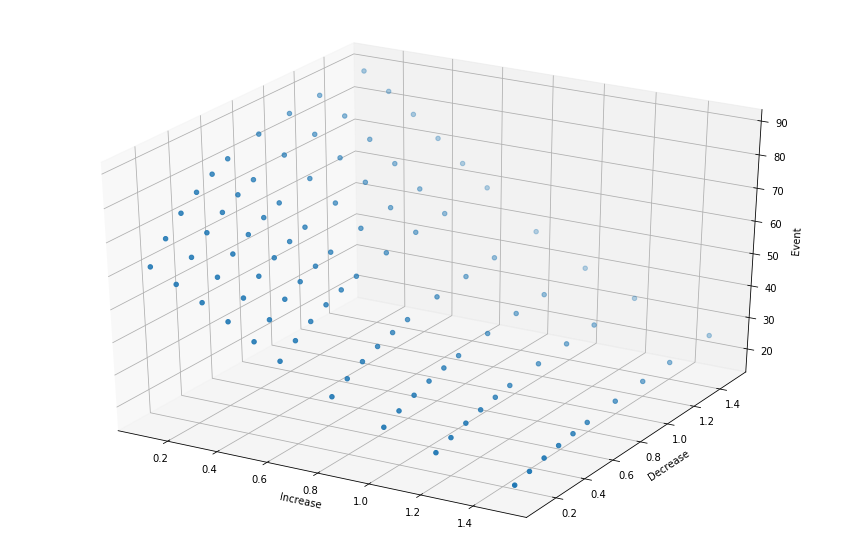

In [40]:
plt.figure(figsize=(15,10))
ax = plt.axes(projection='3d')

# Data for a three-dimensional line

xline = np.array(x_y_z_cor)[:,0]
yline = np.array(x_y_z_cor)[:,1]
zline = np.array(x_y_z_cor)[:,2]

ax.scatter3D(xline, yline, zline, 'gray')


ax.set_xlabel('Increase')
ax.set_ylabel('Decrease')
ax.set_zlabel('Event');
